In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#import dataset from keras
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
#Shape of the dataset
x_train.shape

(60000, 28, 28)

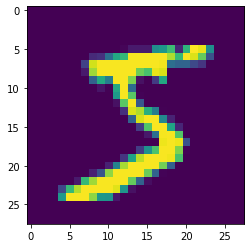

In [5]:
#Let's view an image
plt.imshow(x_train[0])
plt.show()

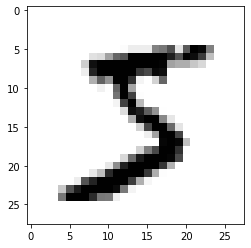

In [6]:
#Black and white
plt.imshow(x_train[0], cmap= plt.cm.binary)

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [8]:
#Normalisation
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)
print(x_train[0]) #Normalized all

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
#Resizing image for applying convolution
x_trainr = np.array(x_train).reshape(-1,28,28,1) #Adding one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1,28,28,1) #Adding one dimension for kernel operation
print("Training samples shape",x_train.shape)
print("Test samples shape",x_test.shape)

Training samples shape (60000, 28, 28)
Test samples shape (10000, 28, 28)


# CNN

In [22]:
from tensorflow.keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten

In [23]:
model = Sequential()

model.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [25]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_4 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)             

In [26]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [27]:
model.fit(x_trainr,y_train,epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.2222 - accuracy: 0.9315 - val_loss: 0.1027 - val_accuracy: 0.9691
Epoch 2/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0695 - accuracy: 0.9784 - val_loss: 0.0638 - val_accuracy: 0.9807
Epoch 3/5
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 0.0722 - val_accuracy: 0.9781
Epoch 4/5
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0513 - val_accuracy: 0.9844
Epoch 5/5
1313/1313 [==============================] - 37s 29ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.0677 - val_accuracy: 0.9800


In [28]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Validation accuracy on 10000 samples", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0603 - accuracy: 0.9820
Validation accuracy on 10000 samples 0.9819999933242798


In [29]:
y_pred = model.predict(x_testr)

In [30]:
y_pred

array([[1.26727994e-11, 1.18456057e-07, 4.88343339e-08, ...,
        9.99985695e-01, 7.54236729e-10, 3.62872242e-07],
       [1.63849792e-04, 4.06907202e-05, 9.99761522e-01, ...,
        5.53818722e-07, 2.78335247e-05, 3.26569101e-08],
       [1.62343525e-08, 9.99994159e-01, 1.51950577e-10, ...,
        4.24263220e-07, 5.29975850e-08, 2.27660871e-06],
       ...,
       [1.68233786e-12, 5.32095783e-07, 3.88005979e-13, ...,
        2.32204052e-08, 1.19816401e-09, 1.05877561e-07],
       [5.74724892e-13, 1.00876935e-13, 2.49754861e-12, ...,
        1.39682677e-09, 2.95706445e-06, 2.79084822e-09],
       [7.53914264e-07, 5.45880319e-09, 9.32328135e-07, ...,
        1.96267340e-08, 1.32781520e-06, 1.98317275e-06]], dtype=float32)

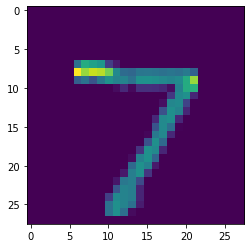

In [32]:
#We need the index of the maximum value of y_pred
plt.imshow(x_test[0])


In [34]:
print(np.argmax(y_pred[0]))

7
